<a href="https://colab.research.google.com/github/JNarimatsu/One_Challenge_Alura_Store/blob/main/AluraStoreBrasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


## Valores Nulos

In [ ]:
loja.isnull().sum()

,0
Produto,0
Categoria do Produto,0
Preço,0
Frete,0
Data da Compra,0
Vendedor,0
Local da compra,0
Avaliação da compra,0
Tipo de pagamento,0
Quantidade de parcelas,0


In [ ]:
loja2.isnull().sum()

,0
Produto,0
Categoria do Produto,0
Preço,0
Frete,0
Data da Compra,0
Vendedor,0
Local da compra,0
Avaliação da compra,0
Tipo de pagamento,0
Quantidade de parcelas,0


In [ ]:
loja3.isnull().sum()

,0
Produto,0
Categoria do Produto,0
Preço,0
Frete,0
Data da Compra,0
Vendedor,0
Local da compra,0
Avaliação da compra,0
Tipo de pagamento,0
Quantidade de parcelas,0


In [ ]:
loja4.isnull().sum()

,0
Produto,0
Categoria do Produto,0
Preço,0
Frete,0
Data da Compra,0
Vendedor,0
Local da compra,0
Avaliação da compra,0
Tipo de pagamento,0
Quantidade de parcelas,0


Não foram encontrados valores faltantes nos conjuntos de dados.

#1. Análise do faturamento



In [ ]:
fat_loja1 = loja['Preço'].sum()

In [ ]:
fat_loja2 = loja2['Preço'].sum()

In [ ]:
fat_loja3 = loja3['Preço'].sum()

In [ ]:
fat_loja4 = loja4['Preço'].sum()

In [ ]:
faturamento = pd.DataFrame({
    'DataFrame': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Faturamento': [fat_loja1, fat_loja2, fat_loja3, fat_loja4]
})

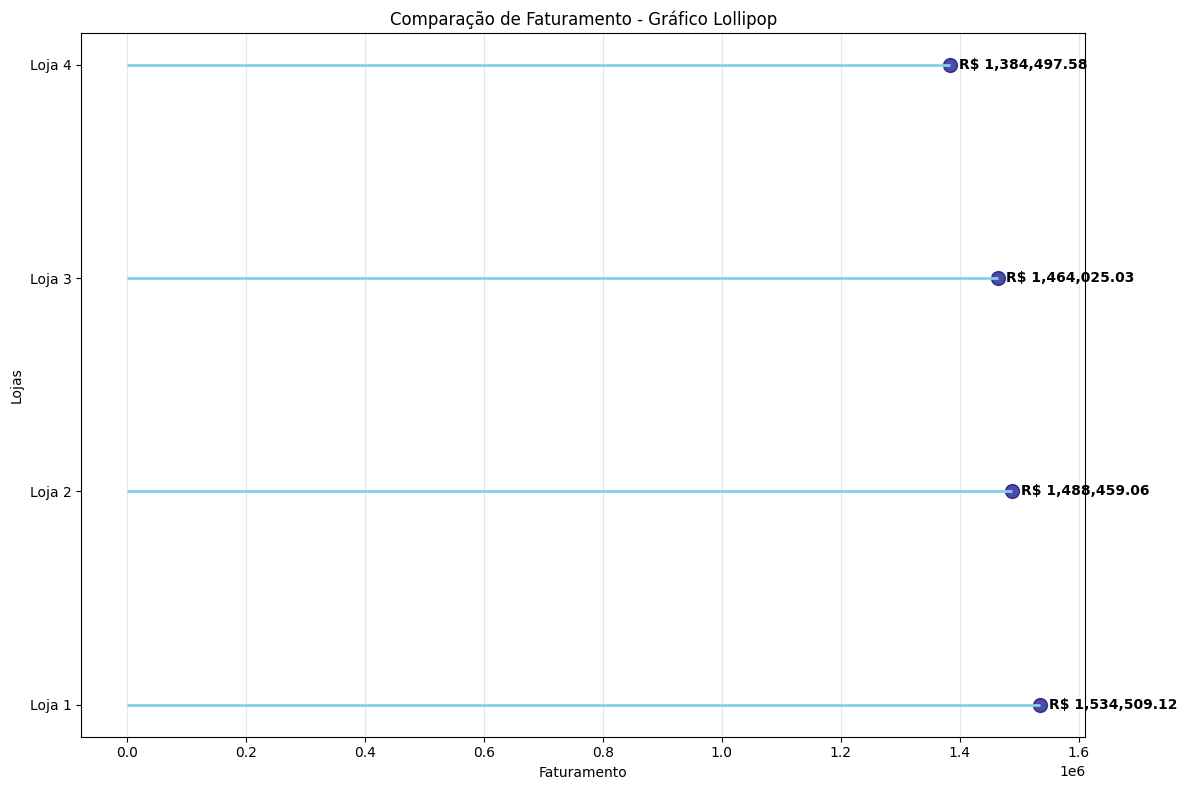

In [ ]:
plt.figure(figsize=(12, 8))
plt.hlines(y=faturamento['DataFrame'], xmin=0, xmax=faturamento['Faturamento'],
           color='skyblue', linewidth=2)
plt.scatter(faturamento['Faturamento'], faturamento['DataFrame'],
           s=100, color='navy', alpha=0.7)
plt.title('Comparação de Faturamento - Gráfico Lollipop')
plt.xlabel('Faturamento')
plt.ylabel('Lojas')
plt.grid(axis='x', alpha=0.3)

for i, v in enumerate(faturamento['Faturamento']):
    plt.text(v + v*0.01, i, f'R$ {v:,.2f}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

A loja um tem maior faturamente, seguinda pelas lojas 2 e 3, com diferença de 24.434,03 reais. Com menor faturamento temos a loja 4 com uma diferença de   150.011,54 reais comparada a loja 1.

# 2. Vendas por Categoria

In [ ]:
cat1 = loja['Categoria do Produto'].value_counts()

In [ ]:
cat2 = loja2['Categoria do Produto'].value_counts()

In [ ]:
cat3 = loja3['Categoria do Produto'].value_counts()

In [ ]:
cat4 = loja4['Categoria do Produto'].value_counts()

In [ ]:
venda_categoria = pd.DataFrame({
    'Loja 1': cat1,
    'Loja 2': cat2,
    'Loja 3': cat3,
    'Loja 4': cat4
}).fillna(0)

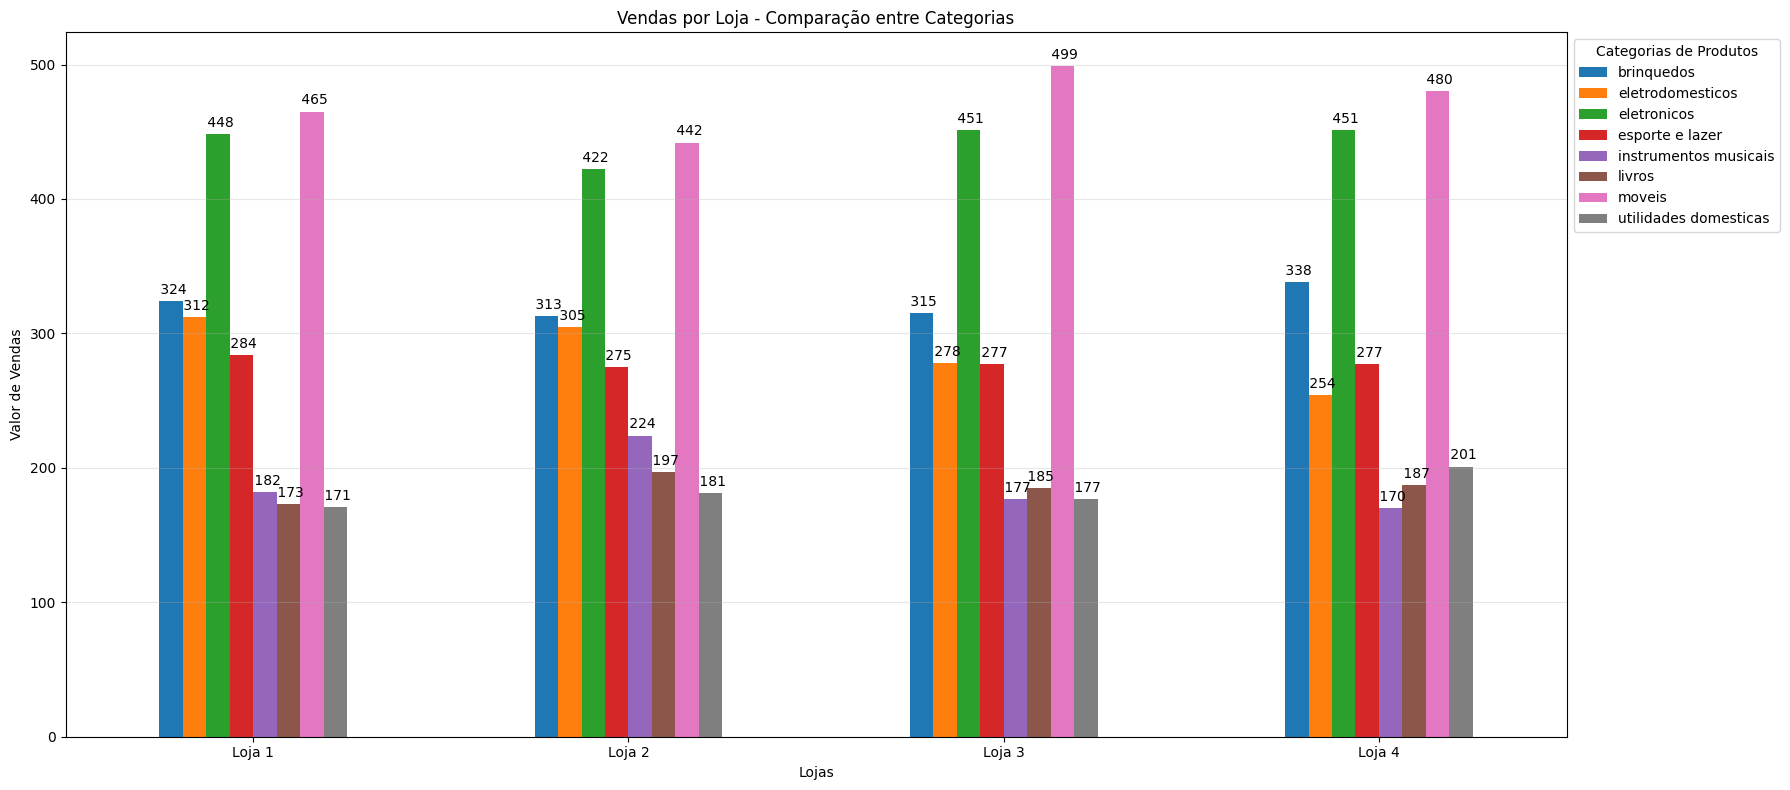

In [ ]:
venda_transposto = venda_categoria.T


ax = venda_transposto.plot.bar(figsize=(18, 8))
plt.title('Vendas por Loja - Comparação entre Categorias')
plt.xlabel('Lojas')
plt.ylabel('Valor de Vendas')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.legend(title='Categorias de Produtos', loc='upper left',
           bbox_to_anchor=(1, 1))

for container in ax.containers:
    ax.bar_label(container, fmt=' %.0f', label_type='edge', padding=3)

plt.tight_layout()
plt.show()



As categorias Móveis e eletrônicos são as mais vendidas, seguido por brinquedos em todas as lojas. Nas lojas 1, 2 e 3 utilidades domésticas é a menos vendida, mas na loja 4 temos instrumentos musicais como a menos vendida.

# 3. Média de Avaliação das Lojas


In [ ]:
nota1 = loja['Avaliação da compra'].mean()

In [ ]:
nota2 = loja2['Avaliação da compra'].mean()

In [ ]:
nota3 = loja3['Avaliação da compra'].mean()

In [ ]:
nota4 = loja4['Avaliação da compra'].mean()

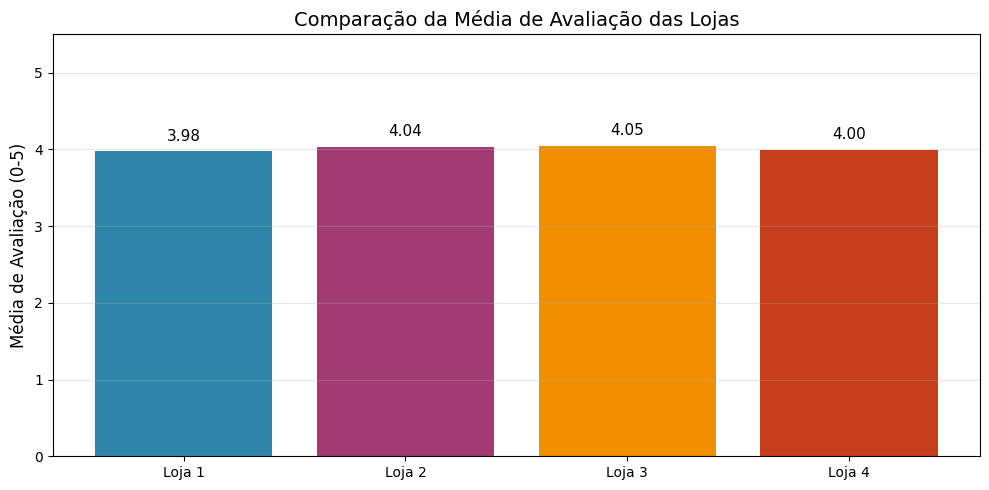

In [ ]:
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
medias_avaliacao = [nota1, nota2, nota3, nota4]

plt.figure(figsize=(10, 5))
bars = plt.bar(lojas, medias_avaliacao, color=['#2E86AB', '#A23B72', '#F18F01', '#C73E1D'])

plt.title('Comparação da Média de Avaliação das Lojas', fontsize=14)
plt.ylabel('Média de Avaliação (0-5)', fontsize=12)
plt.ylim(0, 5.5)
plt.grid(axis='y', alpha=0.3)

for bar, valor in zip(bars, medias_avaliacao):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
             f'{valor:.2f}', ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

A média das avaliações tem poucas variações, mas é possível verificar que as lojas 3 e 4 são as mais bem avaliadas.

# 4. Produtos Mais e Menos Vendidos

In [ ]:
vendas_loja1 = loja['Produto'].value_counts()

In [ ]:
vendas_loja2 = loja2['Produto'].value_counts()

In [ ]:
vendas_loja3 = loja3['Produto'].value_counts()

In [ ]:
vendas_loja4 = loja4['Produto'].value_counts()

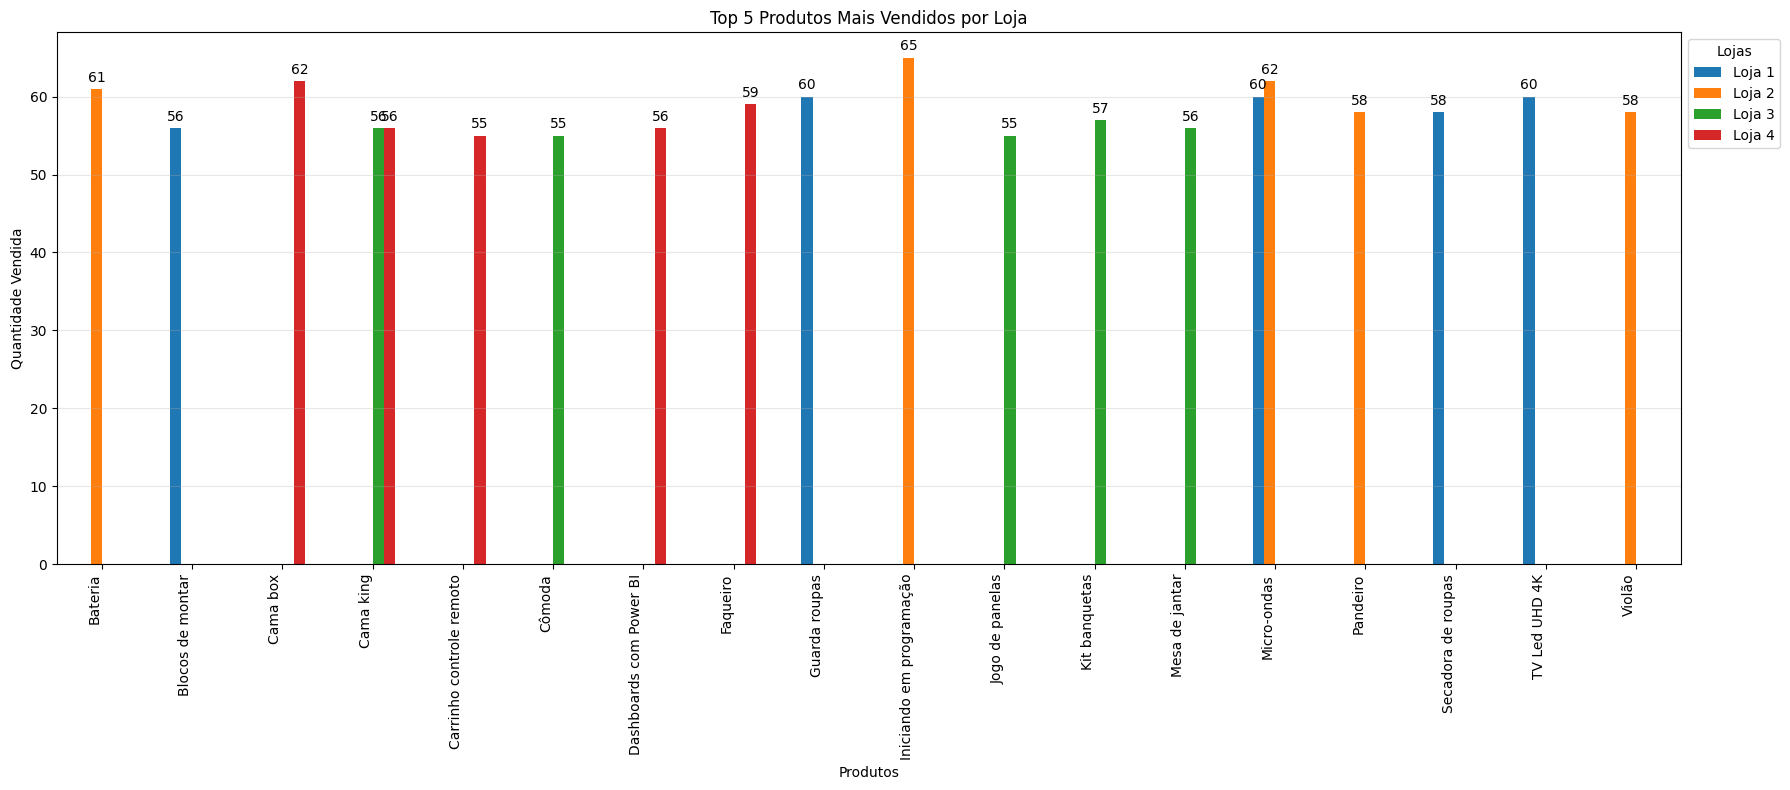

In [ ]:
vendas_produtos = pd.DataFrame({
    'Loja 1': vendas_loja1,
    'Loja 2': vendas_loja2,
    'Loja 3': vendas_loja3,
    'Loja 4': vendas_loja4
}).fillna(0)

top_5_por_loja = vendas_produtos.apply(lambda x: x.nlargest(5), axis=0)

ax = top_5_por_loja.plot.bar(figsize=(18, 8))
plt.title('Top 5 Produtos Mais Vendidos por Loja')
plt.xlabel('Produtos')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=90, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.legend(title='Lojas', loc='upper left', bbox_to_anchor=(1, 1))

for container in ax.containers:
    labels = [f'{w:.0f}' if (w := v.get_height()) > 0 else '' for v in container]
    ax.bar_label(container, labels=labels, label_type='edge', padding=3)

plt.tight_layout()
plt.show()

Loja 01: Microondas, Tv Led UHD 4K e Guarda-Roupas (60), Secadora de roupas(58) e Blocos de montar(56);

Loja 02: Livro - Iniciando em programação(65), Microondas(62), Bateria(62), Pandeiro e Violão(58);

Loja 03: kit baquetas(57), Mesa de jantar, Cama King (56), Cômoda e Jogo de panelas(55);

Loja 04: Cama box(62), Faqueiro(59), Cama king e Livro - Dashboards com Power BI(56) e Carrinho de controle remoto(55);

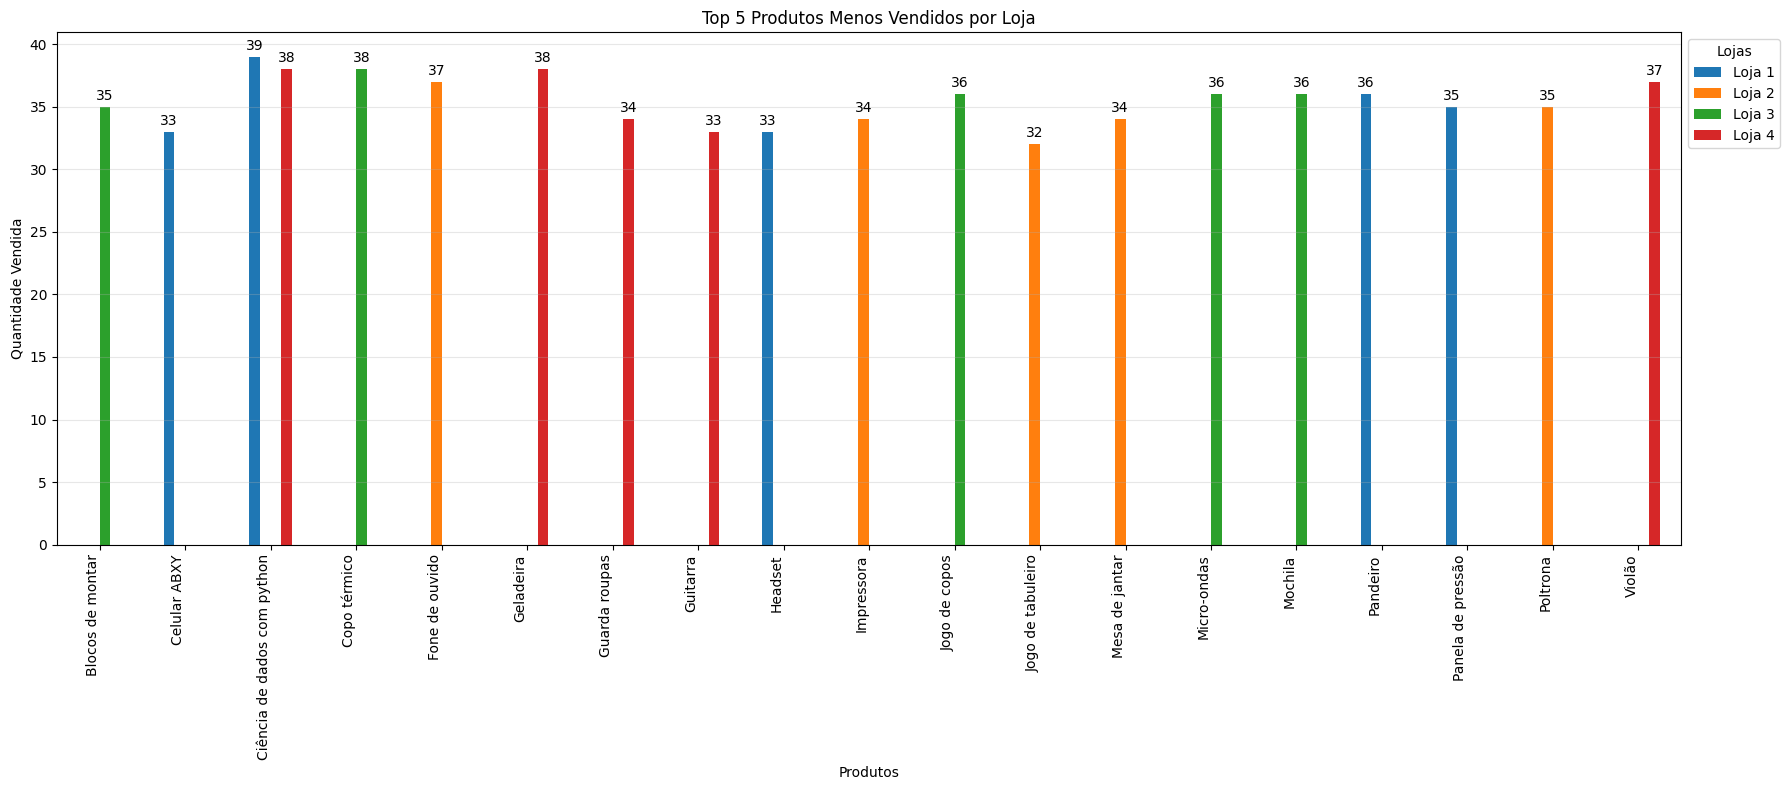

In [ ]:
bottom_5_por_loja = vendas_produtos.apply(lambda x: x.nsmallest(5), axis=0)

ax = bottom_5_por_loja.plot.bar(figsize=(18, 8))
plt.title('Top 5 Produtos Menos Vendidos por Loja')
plt.xlabel('Produtos')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=90, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.legend(title='Lojas', loc='upper left', bbox_to_anchor=(1, 1))

for container in ax.containers:
    labels = [f'{w:.0f}' if (w := v.get_height()) > 0 else '' for v in container]
    ax.bar_label(container, labels=labels, label_type='edge', padding=3)

plt.tight_layout()
plt.show()

Loja 01: Celular ABXY, Headset(33), Panela de pressão, Pandeiro e Livro - Ciências de dados com Python;

Loja 02: Jogo de tabuleiro(32), Mesa de jantar, Impressora, Poltrona e Fone de ouvido;

Loja 03: Blocos de montar(35), Jogo de copos, Micro-ondas, Mochila e Copo Térmico;

Loja 04: Guitarra(33), Guarda-Roupas, Violão, Geladeira e Livro - Ciências de dados com Python(38);

# 5. Frete Médio por Loja

In [ ]:
frete1 = loja['Frete'].mean()

In [ ]:
frete2 = loja2['Frete'].mean()

In [ ]:
frete3 = loja3['Frete'].mean()

In [ ]:
frete4 = loja4['Frete'].mean()

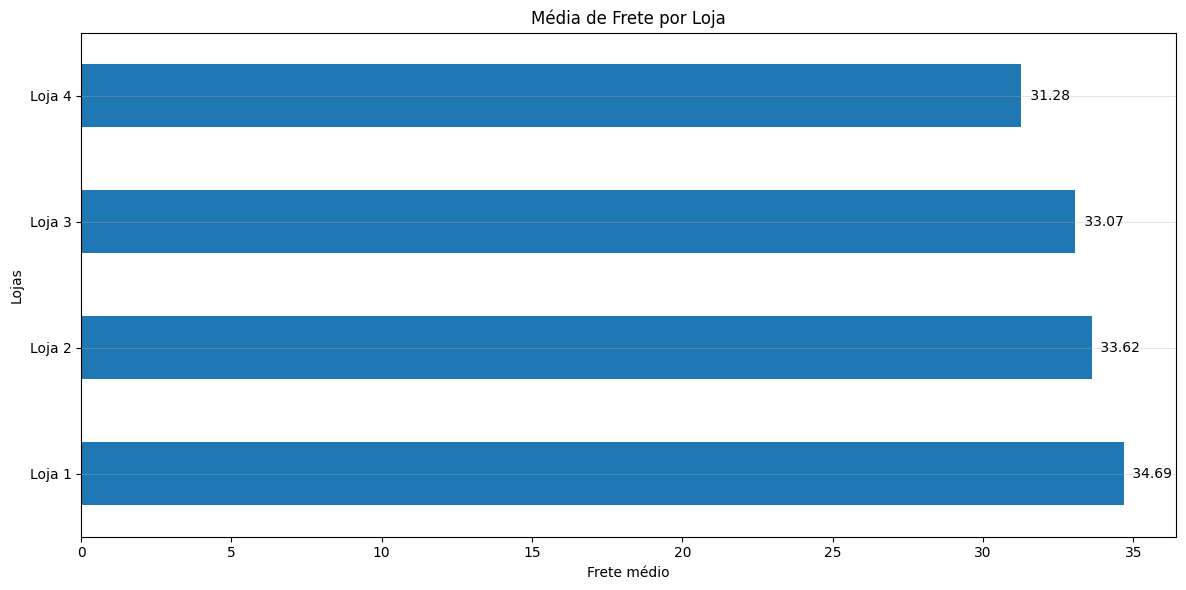

In [ ]:
frete = pd.DataFrame({
    'Loja 1': frete1,
    'Loja 2': frete2,
    'Loja 3': frete3,
    'Loja 4': frete4
}, index=['Frete Médio'])
frete_transposto = frete.T

ax = frete_transposto.plot.barh(figsize=(12, 6), legend=False)
plt.title('Média de Frete por Loja')
plt.xlabel('Frete médio')
plt.ylabel('Lojas')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

for container in ax.containers:
    ax.bar_label(container, fmt=' %.2f', label_type='edge', padding=3)

plt.tight_layout()
plt.show()

Loja 01 tem frete médio com valor mais elevado enquanto a loja 04 tem valor de frete médio mais baixo, Lojas 02 e 03 tem frete médio semelhantes.

--- Heatmap de Concentração Geográfica de Vendas ---


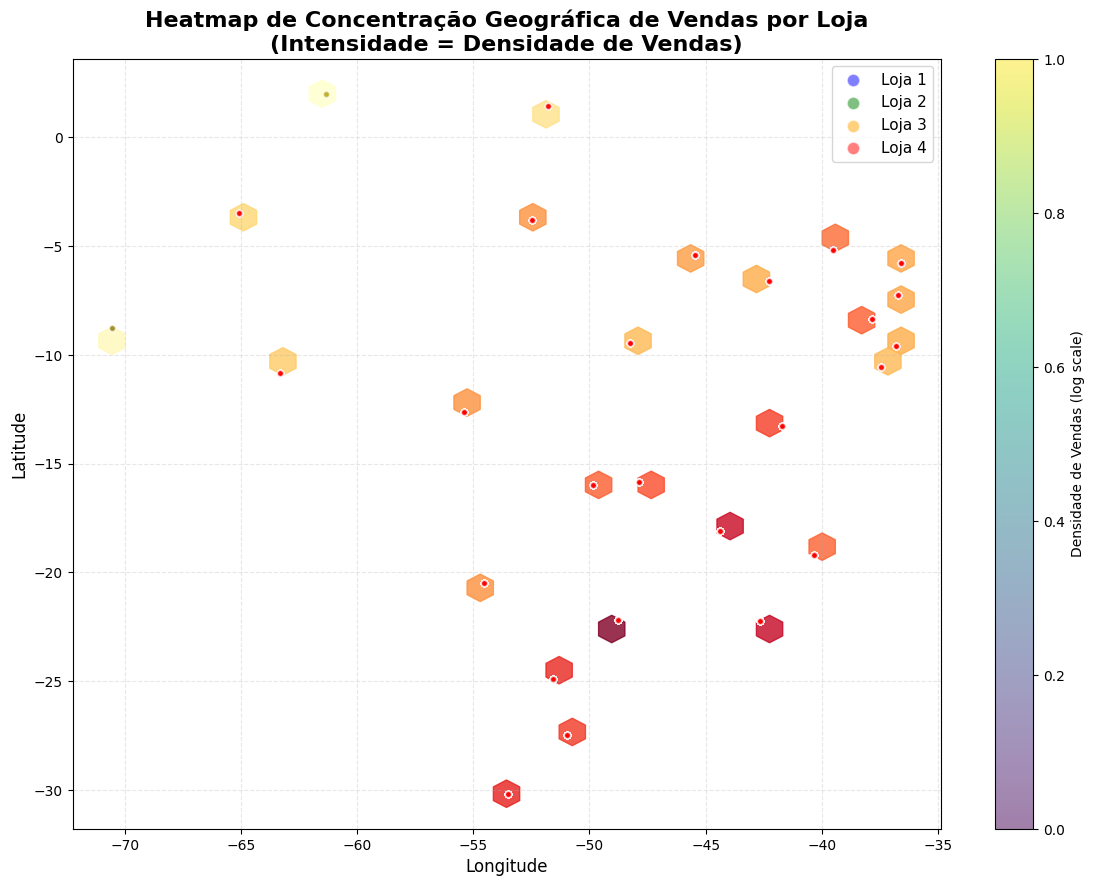

In [42]:
lats1 = loja['lat']; lons1 = loja['lon']
lats2 = loja2['lat']; lons2 = loja2['lon']
lats3 = loja3['lat']; lons3 = loja3['lon']
lats4 = loja4['lat']; lons4 = loja4['lon']

print("--- Heatmap de Concentração Geográfica de Vendas ---")

plt.figure(figsize=(14, 10))

all_lons = np.concatenate([lons1, lons2, lons3, lons4])
all_lats = np.concatenate([lats1, lats2, lats3, lats4])

plt.hexbin(all_lons, all_lats, gridsize=30, cmap='YlOrRd', alpha=0.8, bins='log')

plt.scatter(lons1, lats1, color='blue', alpha=0.5, label='Loja 1', s=20, edgecolors='white')
plt.scatter(lons2, lats2, color='green', alpha=0.5, label='Loja 2', s=20, edgecolors='white')
plt.scatter(lons3, lats3, color='orange', alpha=0.5, label='Loja 3', s=20, edgecolors='white')
plt.scatter(lons4, lats4, color='red', alpha=0.5, label='Loja 4', s=20, edgecolors='white')

plt.title('Concentração Geográfica de Vendas por Loja\n(Intensidade = Densidade de Vendas)', fontsize=16, fontweight='bold')
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.legend(markerscale=2, fontsize=11)
plt.colorbar(label='Densidade de Vendas (log scale)')
plt.grid(True, linestyle='--', alpha=0.3)

plt.show()

In [48]:
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt

print("=== ANÁLISE ESTRATÉGICA COMPLETA ===\n")

print("1. 📍 QUAL LOJA TEM A ESTRATÉGIA TERRITORIAL MAIS EFICIENTE?")
print("------------------------------------------------------------")

eficiencia_lojas = {}

for i, (lats, lons, nome) in enumerate([
    (lats1, lons1, 'Loja 1'),
    (lats2, lons2, 'Loja 2'),
    (lats3, lons3, 'Loja 3'),
    (lats4, lons4, 'Loja 4')
], 1):

    area_cobertura = (max(lons) - min(lons)) * (max(lats) - min(lats))
    densidade_vendas = len(lons) / area_cobertura if area_cobertura > 0 else 0
    dispersao = np.std(lons) + np.std(lats)

    eficiencia_lojas[nome] = {
        'vendas': len(lons),
        'area': area_cobertura,
        'densidade': densidade_vendas,
        'dispersao': dispersao,
        'eficiencia': densidade_vendas / dispersao if dispersao > 0 else 0
    }

    print(f"{nome}:")
    print(f"  • Vendas: {len(lons)}")
    print(f"  • Área coberta: {area_cobertura:.6f}°")
    print(f"  • Densidade: {densidade_vendas:.2f} vendas/°²")
    print(f"  • Dispersão: {dispersao:.4f}")
    print(f"  • Score eficiência: {eficiencia_lojas[nome]['eficiencia']:.2f}\n")

loja_mais_eficiente = max(eficiencia_lojas.items(), key=lambda x: x[1]['eficiencia'])
print(f"🎯 RESPOSTA: {loja_mais_eficiente[0]} tem a estratégia mais eficiente!")
print(f"   Motivo: Alta densidade de vendas com boa concentração geográfica\n")

print("2. ⚠️ EXISTE CANIBALIZAÇÃO ENTRE NOSSAS PRÓPRIAS LOJAS?")
print("------------------------------------------------------")

todos_lons = np.concatenate([lons1, lons2, lons3, lons4])
todos_lats = np.concatenate([lats1, lats2, lats3, lats4])

grid_size = 20
lon_grid = np.linspace(min(todos_lons), max(todos_lons), grid_size)
lat_grid = np.linspace(min(todos_lats), max(todos_lats), grid_size)

sobreposicoes = 0
areas_concorrencia = []

for i in range(len(lon_grid)-1):
    for j in range(len(lat_grid)-1):
        celula_lojas = []

        for lats, lons, nome in [(lats1, lons1, 'L1'), (lats2, lons2, 'L2'),
                                (lats3, lons3, 'L3'), (lats4, lons4, 'L4')]:
            mask = (lons >= lon_grid[i]) & (lons < lon_grid[i+1]) & \
                   (lats >= lat_grid[j]) & (lats < lat_grid[j+1])
            if mask.any():
                celula_lojas.append(nome)

        if len(celula_lojas) > 1:
            sobreposicoes += 1
            areas_concorrencia.append((lon_grid[i], lat_grid[j], celula_lojas))

print(f"Áreas com sobreposição: {sobreposicoes}/{grid_size*grid_size} células")
if sobreposicoes > 0:
    print("🚨 ALERTA: Possível canibalização detectada!")
    print("   Áreas onde múltiplas lojas competem pelos mesmos clientes")
else:
    print("✅ Baixo risco de canibalização\n")






=== ANÁLISE ESTRATÉGICA COMPLETA ===

1. 📍 QUAL LOJA TEM A ESTRATÉGIA TERRITORIAL MAIS EFICIENTE?
------------------------------------------------------------
Loja 1:
  • Vendas: 2359
  • Área coberta: 1072.456800°
  • Densidade: 2.20 vendas/°²
  • Dispersão: 9.5536
  • Score eficiência: 0.23

Loja 2:
  • Vendas: 2359
  • Área coberta: 1092.153600°
  • Densidade: 2.16 vendas/°²
  • Dispersão: 9.4881
  • Score eficiência: 0.23

Loja 3:
  • Vendas: 2359
  • Área coberta: 1092.153600°
  • Densidade: 2.16 vendas/°²
  • Dispersão: 9.6610
  • Score eficiência: 0.22

Loja 4:
  • Vendas: 2358
  • Área coberta: 900.345800°
  • Densidade: 2.62 vendas/°²
  • Dispersão: 9.5902
  • Score eficiência: 0.27

🎯 RESPOSTA: Loja 4 tem a estratégia mais eficiente!
   Motivo: Alta densidade de vendas com boa concentração geográfica

2. ⚠️ EXISTE CANIBALIZAÇÃO ENTRE NOSSAS PRÓPRIAS LOJAS?
------------------------------------------------------
Áreas com sobreposição: 24/400 células
🚨 ALERTA: Possível canibali

# Relatório Final

### Introdução

Estamos analisando os bancos de dados das lojas 01, 02, 03 e 04 pertencente ao senhor João que deseja verificar alguns KPIs para decidir qual loja deve ser vendida. Realizamos uma análise exploratória nos dados comparando os resultados de cada loja. Criamos gráficos para facilitar as visualizações dessas análises.

### Comparação de faturamento:
A loja 01 um tem maior faturamente, seguida pelas lojas 2 e 3, com diferença de 24.434,03 reais. Com menor faturamento temos a loja 4 com uma diferença de 150.011,54 reais comparada a loja 1.

### Vendas por categoria
As categorias Móveis e eletrônicos são as mais vendidas, seguido por brinquedos em todas as lojas. Nas lojas 1, 2 e 3 utilidades domésticas é a menos vendida, mas na loja 4 temos instrumentos musicais como a menos vendida.

### Média de avaliação das lojas
A média das avaliações tem poucas variações, mas é possível verificar que as lojas 2 e 3 (variação de 0,01 entre elas) são as mais bem avaliadas. A diferença entre a avaliação da loja 01 e a loja 03 são de 0,07. Entre as lojas 03 e 04 tem diferença de 0,05.

### Produtos mais e menos vendidos
#### Mais vendidos
Loja 01: Microondas, Tv Led UHD 4K e Guarda-Roupas (60), Secadora de roupas e Blocos de montar;

Loja 02: Livro - Iniciando em programação, Microondas, Batedeira, Pandeiro e Violão;

Loja 03: kit baquetas, Mesa de jantar, Cama King (56), Cômoda e Jogo de panelas(55);

Loja 04: Cama box, Faqueiro, Cama king e Livro - Dashboards com Power BI(56) e Carrinho de controle remoto;

#### Menos Vendidos
Loja 01: Celular ABXY, Headset(33), Panela de pressão, Pandeiro e Livro - Ciências de dados com Python;

Loja 02: Jogo de tabuleiro, Mesa de jantar, Impressora, Poltrona e Fone de ouvido;

Loja 03: Blocos de montar, Jogo de copos, Micro-ondas, Mochila e Copo Térmico;

Loja 04: Guitarra, Guarda-Roupas, Violão, Geladeira e Livro - Ciências de dados com Python(38);

### Frete médio por loja
Loja 01 tem frete médio com valor mais elevado enquanto a loja 04 tem valor de frete médio mais baixo, Lojas 02 e 03 tem frete médio semelhantes.

## Conclusão
Apesar de observamos o menor faturamento, a loja 04 se destaca com Alta densidade de vendas e boa concentração geográfica, suas avaliações não são baixas em comparação com as demais notas e temos uma valor de frete médio abaixo das demais lojas analisadas, a loja quatro apresenta o Score de eficiência mais elevados também. Quando observamos as outras três lojas, todas apresentam perfil de vendas similiar, isso em conjunto com a área de atuação proxima. Com isso em mente, podemos verificar que as lojas um e dois tem o mesmo Score de eficiência, enquanto a loja três tem uma diferença um pouco menor. As lojas três e dois apresentam as melhores avaliações de vendas e o valor do frete médio são similares. Já na loja um temos uma cenário um pouco diferente, a loja um conta com a avaliação mais baixa e o frete mais elevado. Podemos observar muitas semelhanças entre as lojas três e dois, sua área de atuação, produtos e categorias similares de venda, esses fatores me mostram um forte potencial de canibalização entre essas duas lojas, visto que a loja tem tem faturamento e o scrore de eficiência um pouco mais elevado que a loja três, eu indicaria a loja três para venda, isso manteria o alto faturamento da loja um, a alta densidade e boa concentração de vendas da loja quatro e além do faturamento e boa relação com os cliente que temos na loja dois.